In [45]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score # For Checking Accuracy
from sklearn.model_selection import train_test_split # Splitting Data For Train Test
from sklearn.neighbors import KNeighborsClassifier # ML Algo KNN
from sklearn import metrics
from sklearn.model_selection import cross_val_score # For Cross Validation
import warnings
warnings.filterwarnings('ignore')

In [46]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [47]:
train.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [48]:
train.shape

(900000, 33)

In [49]:
train.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,449999.500000,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,...,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654,0.486488
std,259807.765474,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,...,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989,0.499818
min,0.000000,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,...,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000,0.000000
25%,224999.750000,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,...,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000,0.000000
50%,449999.500000,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,...,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000,0.000000
75%,674999.250000,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,...,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000,1.000000
max,899999.000000,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,...,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000,1.000000


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

In [51]:
del train['id']
del train['f_27']

[0.03159444 0.0317326  0.0317438  0.02862503 0.02885213 0.03003605
 0.02883214 0.03547237 0.02885565 0.03079379 0.02819995 0.02926243
 0.03211412 0.02624102 0.03021697 0.03121753 0.02734757 0.02969873
 0.02760916 0.04223374 0.03641766 0.04902233 0.04000357 0.03981701
 0.04798495 0.04229939 0.05002743 0.03655113 0.01195612 0.0352412 ]


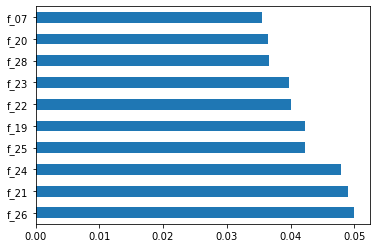

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Checking For Related Features with the target label
X = train.drop(columns=['target'])
y = train['target']

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [52]:
newtrain = train[['f_26', 'f_21', 'f_24', 'f_25', 'f_19', 'f_22', 'target']]
newtrain.head()

,f_26,f_21,f_24,f_25,f_19,f_22,target
0,1.363402,3.058541,-2.730628,-0.208177,0.298218,-2.540739,0
1,-0.058316,2.179050,-1.217077,-3.782194,-3.147667,2.278315,1
2,-3.703488,-0.784235,-0.009121,2.788536,2.820733,-1.385775,1
3,-0.608601,-2.343819,1.686035,-2.533098,1.081084,0.572594,1
4,4.371371,1.133665,2.127649,-3.306784,-0.126179,-3.912929,1


In [53]:
newtrain.shape

(900000, 7)

In [54]:
# Separating Target & Other Columns
XTT = newtrain.drop(columns=['target'])
yTT = newtrain['target']

# Training Testing (Split Data 80% 20%)
X_train, X_test, y_train, y_test = train_test_split(XTT, yTT, test_size=0.2)

In [55]:
# KNN
leaf_size = list(range(15,30))
n_neighbors = list(range(15,30))
p=4
for i,j in zip(leaf_size, n_neighbors):
    # KNN
    modelKNN = KNeighborsClassifier(n_neighbors=j, leaf_size=i, p=p)
    resultKNN = modelKNN.fit(X_train, y_train)
    prediction_test = modelKNN.predict(X_test)
    accuracyKNN = metrics.accuracy_score(y_test, prediction_test)
    print('----------------------------------------------')
    print('Leaf Size: ', i)
    print('N Neighbours: ', j)
    print('P: ', p)
    print("Model Accuracy (KNN):" "\n", accuracyKNN)
    print('----------------------------------------------')

----------------------------------------------
Leaf Size:  15
N Neighbours:  15
P:  4
Model Accuracy (KNN):
 0.6589444444444444
----------------------------------------------
----------------------------------------------
Leaf Size:  16
N Neighbours:  16
P:  4
Model Accuracy (KNN):
 0.6594166666666667
----------------------------------------------
----------------------------------------------
Leaf Size:  17
N Neighbours:  17
P:  4
Model Accuracy (KNN):
 0.6605611111111112
----------------------------------------------
----------------------------------------------
Leaf Size:  18
N Neighbours:  18
P:  4
Model Accuracy (KNN):
 0.6607833333333333
----------------------------------------------
----------------------------------------------
Leaf Size:  19
N Neighbours:  19
P:  4
Model Accuracy (KNN):
 0.6624333333333333
----------------------------------------------
----------------------------------------------
Leaf Size:  20
N Neighbours:  20
P:  4
Model Accuracy (KNN):
 0.66326666666666

In [56]:
# KNearestNeighbors
knn_clf = KNeighborsClassifier() # Initializing KNN
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=5) # Initializing Cross Validation By Passing KNN Classifier -
# - and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
knn_mean = knn_scores.mean() # Mean of calculated scores
print(knn_mean)

0.6361777777777778


In [57]:
test = pd.read_csv('test.csv')

In [58]:
test.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


In [59]:
test.shape

(700000, 32)

In [60]:
newtest = test[['f_26', 'f_21', 'f_24', 'f_25', 'f_19', 'f_22']]
newtest.head()

,f_26,f_21,f_24,f_25,f_19,f_22
0,5.734205,-1.006400,-2.427430,-1.966887,-1.128371,-1.193879
1,3.194219,2.382405,-2.848714,-0.725155,-4.424098,0.149442
2,0.066898,-7.026098,1.714005,0.585032,-1.523864,1.312277
3,3.893099,-0.594532,-2.364007,-1.003320,-1.404597,-3.939475
4,1.861884,0.084906,-3.557893,1.210687,-1.968516,-0.985736


In [61]:
newtest.shape

(700000, 6)

In [62]:
owaisCSV = test[['id']]

In [63]:
owaisCSV

,id
0,900000
1,900001
2,900002
3,900003
4,900004
...,...
699995,1599995
699996,1599996
699997,1599997
699998,1599998


In [64]:
predictionOnTest = modelKNN.predict(newtest)

In [65]:
predictionOnTest

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [66]:
owaisCSV['target'] = predictionOnTest

In [67]:
owaisCSV

,id,target
0,900000,1
1,900001,1
2,900002,0
3,900003,0
4,900004,0
...,...,...
699995,1599995,0
699996,1599996,1
699997,1599997,0
699998,1599998,1


In [70]:
owaisCSV.to_csv('owaisCSV_Test_KNN.csv', index=False)

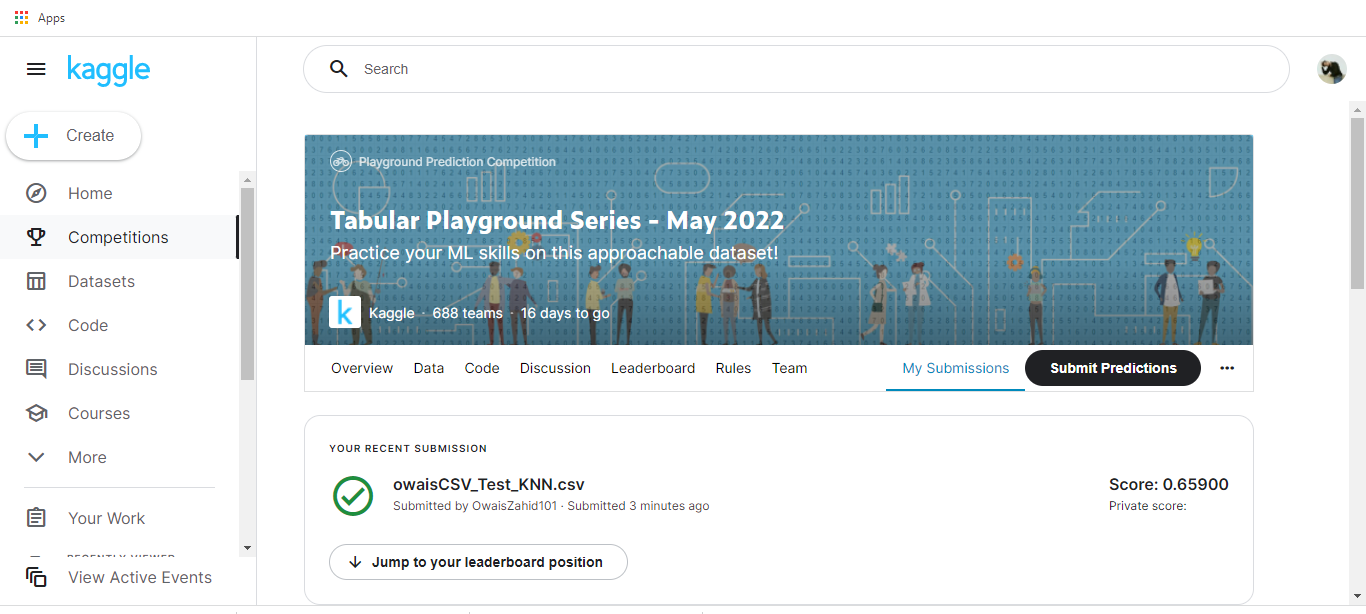# 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier(n_neighbors=15)
#Create x and y variables.
# x = df.drop(columns=['target'])
# y = df['target']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(XTT, yTT, test_size=0.2, random_state=4)
#Training the model.
knn.fit(x_train, y_train)
#Predict test data set.
y_pred = knn.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred)


              precision    recall  f1-score   support

           0       0.67      0.67      0.67     92752
           1       0.65      0.64      0.65     87248

    accuracy                           0.66    180000
   macro avg       0.66      0.66      0.66    180000
weighted avg       0.66      0.66      0.66    180000



0.6580424176397733

In [28]:
#List Hyperparameters that we want to tune.
from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,4))
n_neighbors = list(range(1,5))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=5)
#Fit the model
best_model = clf.fit(XTT,yTT)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 4


# Kaggle Final Score

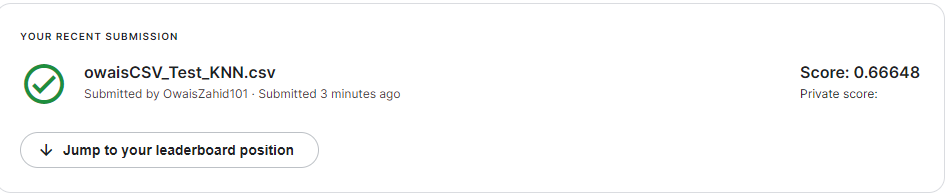# 